<a href="https://colab.research.google.com/github/Anish32/Real-EState-Prediction/blob/main/Real_EState_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install xgboost

In [6]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, VotingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error


In [7]:
import pandas as pd
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("amitabhajoy/bengaluru-house-price-data")

print("Path to dataset files:", path)
csv_file_path = os.path.join(path, "Bengaluru_House_Data.csv")
# Ensure this line successfully creates the 'df' DataFrame
df= pd.read_csv(csv_file_path)

Path to dataset files: /kaggle/input/bengaluru-house-price-data


In [8]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [9]:
df.shape

(13320, 9)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [11]:
df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [12]:
(df.isnull().sum() / df.shape[0]) * 100

,0
area_type,0.000000
availability,0.000000
location,0.007508
size,0.120120
society,41.306306
total_sqft,0.000000
bath,0.548048
balcony,4.572072
price,0.000000


In [13]:
df.drop(columns=['society'],inplace=True)

In [14]:
df.nunique()

,0
area_type,4
availability,81
location,1305
size,31
total_sqft,2117
bath,19
balcony,4
price,1994


In [15]:
for cols in df.columns:
    print((df[cols].value_counts()/df.shape[0])*100)

area_type
Super built-up  Area    65.990991
Built-up  Area          18.153153
Plot  Area              15.202703
Carpet  Area             0.653153
Name: count, dtype: float64
availability
Ready To Move    79.436937
18-Dec            2.304805
18-May            2.214715
18-Apr            2.034535
18-Aug            1.501502
                   ...    
16-Oct            0.007508
17-Jan            0.007508
16-Nov            0.007508
16-Jan            0.007508
14-Jul            0.007508
Name: count, Length: 81, dtype: float64
location
Whitefield                         4.054054
Sarjapur  Road                     2.995495
Electronic City                    2.267267
Kanakpura Road                     2.049550
Thanisandra                        1.756757
                                     ...   
3rd Stage Raja Rajeshwari Nagar    0.007508
Chuchangatta Colony                0.007508
Electronic City Phase 1,           0.007508
Chikbasavanapura                   0.007508
Abshot Layout              

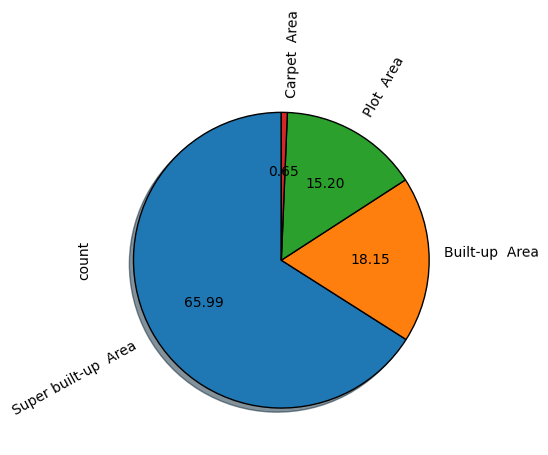

In [16]:
df['area_type'].value_counts().plot.pie(autopct='%.2f',shadow=True,startangle=90,wedgeprops={'edgecolor':'black'},rotatelabels=True)
plt.show()

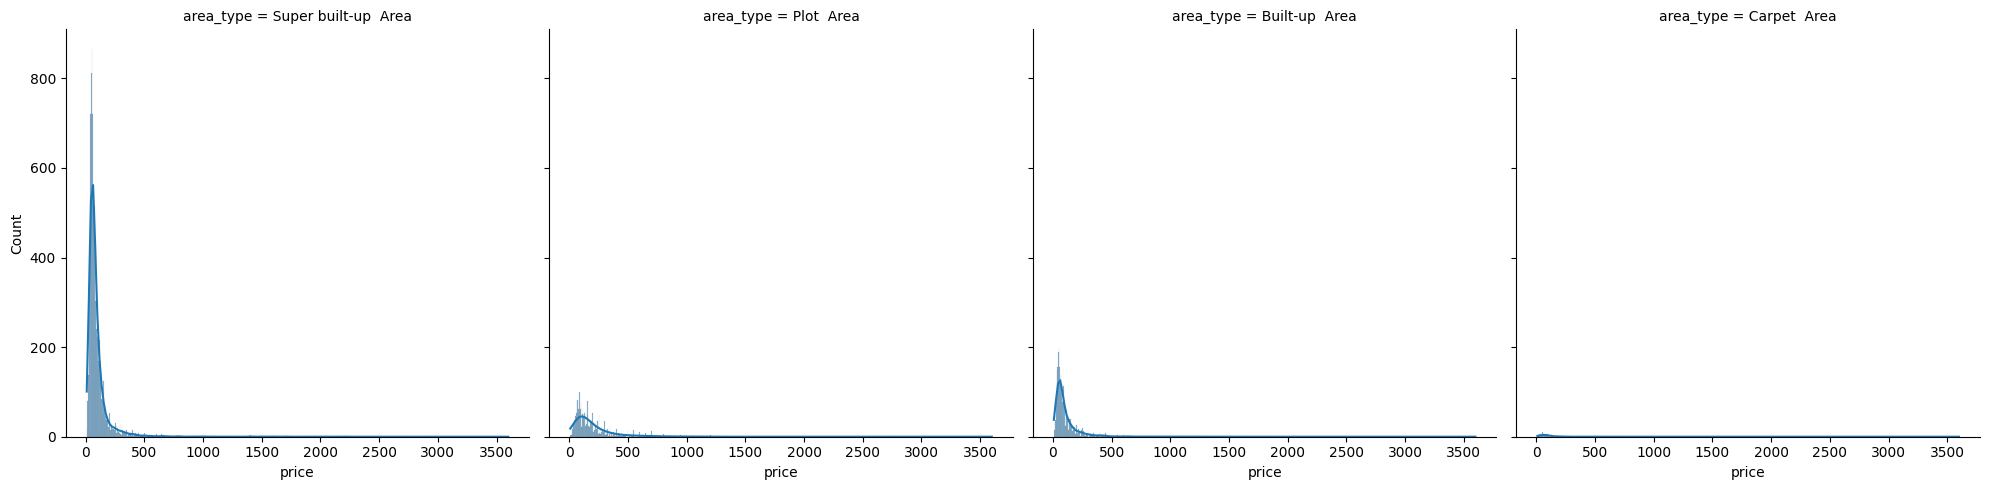

In [17]:
sns.displot(df, x="price", col="area_type", kde=True, col_wrap=4)
plt.show()

In [18]:
df.drop(columns=['area_type'],inplace=True)

In [19]:
(df['availability'].value_counts()/df.shape[0])*100

,count
availability,
Ready To Move,79.436937
18-Dec,2.304805
18-May,2.214715
18-Apr,2.034535
18-Aug,1.501502
...,...
16-Oct,0.007508
17-Jan,0.007508
16-Nov,0.007508


In [20]:
df.drop(columns=['availability'],inplace=True)

In [21]:
df.sample(3)

,location,size,total_sqft,bath,balcony,price
11623,Nagavara,3 Bedroom,2000,2.0,2.0,275.0
1412,Chikka Banaswadi,2 BHK,1093,2.0,2.0,65.0
7132,Vijayanagar,2 BHK,1178,2.0,3.0,82.0


In [22]:
df['location'].value_counts()

,count
location,
Whitefield,540
Sarjapur Road,399
Electronic City,302
Kanakpura Road,273
Thanisandra,234
...,...
3rd Stage Raja Rajeshwari Nagar,1
Chuchangatta Colony,1
"Electronic City Phase 1,",1


In [23]:
df['location'].isna().sum()

np.int64(1)

In [24]:
df['location'] = df['location'].fillna('Whitefield')

In [25]:
df['location'].nunique()

1305

In [26]:
location_counts = df['location'].value_counts()

In [27]:
len(location_counts[location_counts<=10])

1064

In [28]:
len(location_counts[location_counts>10])

241

In [29]:
df['location'] = df['location'].apply(lambda x:'other' if location_counts[x]<=10 else x)

In [30]:
df['location'].nunique()

242

In [31]:
df.sample(3)

,location,size,total_sqft,bath,balcony,price
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.0
7021,Haralur Road,2 BHK,1194,2.0,2.0,47.0
10052,other,2 BHK,1340,2.0,1.0,71.0


In [32]:
df['size'].isnull().sum()

np.int64(16)

In [33]:
df['size'].value_counts()

,count
size,
2 BHK,5199
3 BHK,4310
4 Bedroom,826
4 BHK,591
3 Bedroom,547
1 BHK,538
2 Bedroom,329
5 Bedroom,297
6 Bedroom,191


In [34]:
df['size'] = df['size'].fillna('2 BHK')
df['size'].value_counts()

,count
size,
2 BHK,5215
3 BHK,4310
4 Bedroom,826
4 BHK,591
3 Bedroom,547
1 BHK,538
2 Bedroom,329
5 Bedroom,297
6 Bedroom,191


In [35]:
df['BHK'] = df['size'].str.split(' ').str[0].astype(int)
df['BHK'].value_counts()

,count
BHK,
2,5544
3,4857
4,1417
1,656
5,356
6,221
7,100
8,89
9,54


In [36]:
df.drop(columns=['size'],inplace=True)
df.sample(5)

,location,total_sqft,bath,balcony,price,BHK
1024,1st Phase JP Nagar,1200,7.0,2.0,240.0,8
2229,Electronic City,921,2.0,1.0,34.0,2
10850,Tumkur Road,1035,2.0,1.0,39.0,2
7068,Electronic City,1355,2.0,1.0,67.0,2
195,Yelahanka,1327,2.0,2.0,98.0,2


In [37]:
df['total_sqft'].nunique()

2117

In [38]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [39]:
def convert_ranges_to_sqft(x):
    temp = x.split('-')
    if(len(temp)==2):
        return (float(temp[0])+float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [40]:
df['total_sqft'] = df['total_sqft'].apply(convert_ranges_to_sqft)
df.sample(3)

,location,total_sqft,bath,balcony,price,BHK
2449,other,600.0,2.0,1.0,110.0,3
672,other,4046.0,4.0,0.0,445.0,4
953,Yelahanka,3206.0,5.0,NaN,270.0,4


In [41]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']
df['price_per_sqft']

,price_per_sqft
0,3699.810606
1,4615.384615
2,4305.555556
3,6245.890861
4,4250.000000
...,...
13315,6689.834926
13316,11111.111111
13317,5258.545136
13318,10407.336319


In [42]:
df.describe()

,total_sqft,bath,balcony,price,BHK,price_per_sqft
count,13274.000000,13247.000000,12711.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.692610,1.584376,112.565627,2.802778,7.907501e+03
std,1238.405258,1.341458,0.817263,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,0.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,1.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,2.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3.000000,3600.000000,43.000000,1.200000e+07


In [43]:
df.sample(3)

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
3334,Ananth Nagar,1200.0,2.0,1.0,65.0,3,5416.666667
9868,Koramangala,1745.0,3.0,3.0,98.0,3,5616.045845
11275,Sarjapur Road,1879.0,3.0,2.0,155.0,3,8249.068654


In [44]:
df['bath'].nunique()

19

In [45]:
df['bath'].value_counts()

,count
bath,
2.0,6908
3.0,3286
4.0,1226
1.0,788
5.0,524
6.0,273
7.0,102
8.0,64
9.0,43


In [46]:
df['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [47]:
df['bath'].isnull().sum()

np.int64(73)

<Axes: xlabel='bath', ylabel='count'>

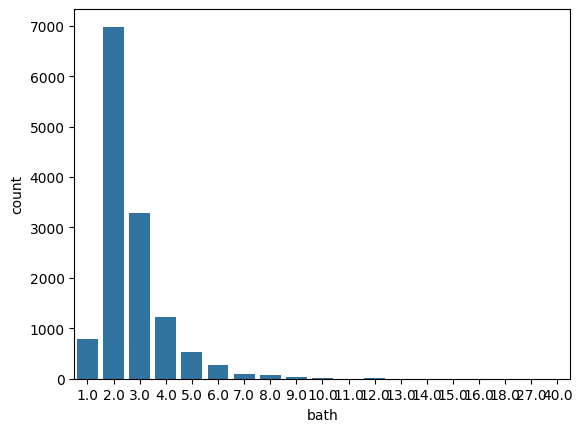

In [48]:
df['bath'] = df['bath'].fillna(df['bath'].median())
sns.countplot(x=df['bath'])

In [49]:
df.sample(3)

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
6828,Sector 7 HSR Layout,1200.0,4.0,1.0,275.0,3,22916.666667
4778,Rajaji Nagar,1263.0,2.0,0.0,107.0,2,8471.892320
104,other,1200.0,2.0,2.0,50.0,2,4166.666667


In [50]:
df['balcony'].nunique()

4

In [51]:
df['balcony'].value_counts()

,count
balcony,
2.0,5113
1.0,4897
3.0,1672
0.0,1029


In [52]:
df['balcony'].isnull().sum()

np.int64(609)

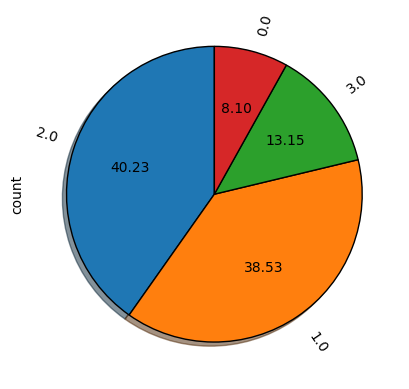

In [53]:
df['balcony'].value_counts().plot.pie(autopct='%.2f',shadow=True,startangle=90,wedgeprops={'edgecolor':'black'},rotatelabels=True)
plt.show()

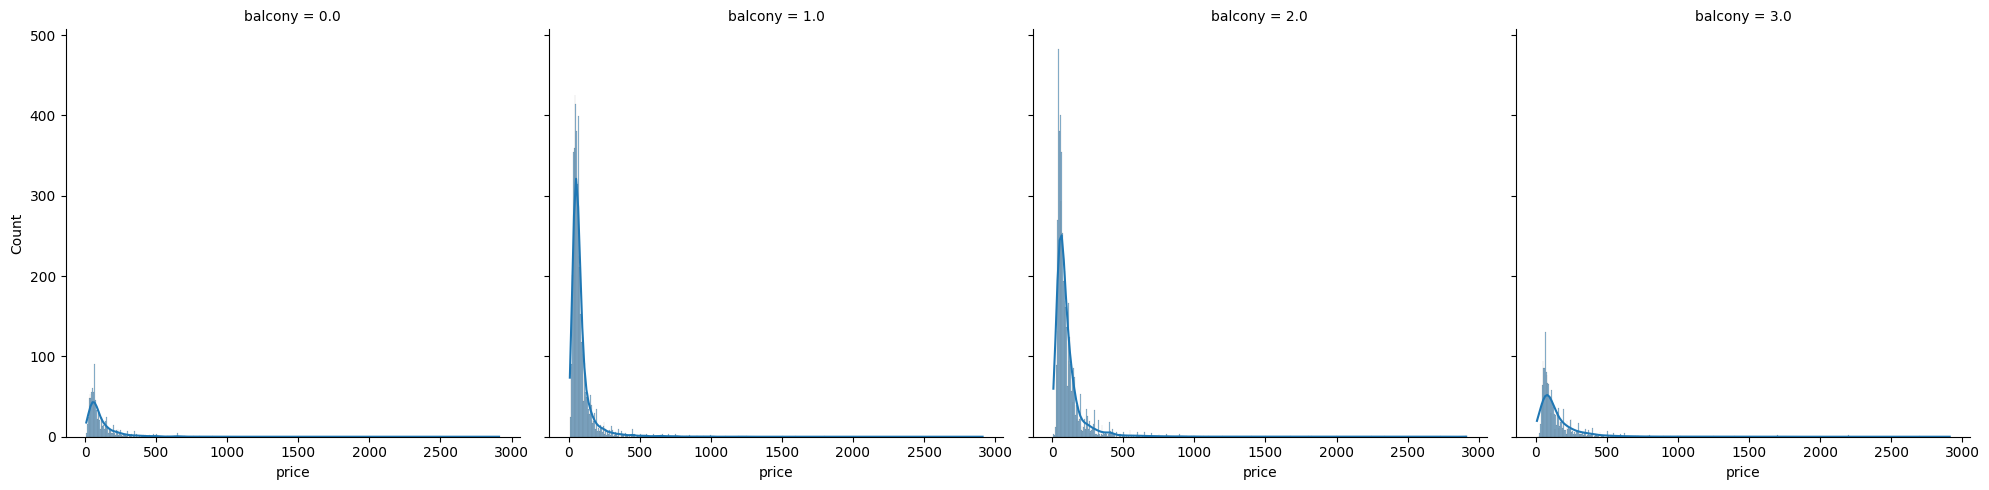

In [54]:
sns.displot(df, x="price", col="balcony", kde=True, col_wrap=4)
plt.show()

In [55]:
df.drop(columns=['balcony'],inplace=True)
df.sample(3)

,location,total_sqft,bath,price,BHK,price_per_sqft
10929,Hebbal Kempapura,1436.0,2.0,75.00,3,5222.841226
2838,Vijayanagar,606.0,1.0,34.78,1,5739.273927
6146,Electronic City,919.0,2.0,34.00,2,3699.673558


In [56]:
df.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [57]:
(df['total_sqft']/df['BHK']).describe()

,0
count,13274.000000
mean,575.074878
std,388.205175
min,0.250000
25%,473.333333
50%,552.500000
75%,625.000000
max,26136.000000


In [58]:
df = df[(df['total_sqft']/df['BHK']) >= 300]
df.shape

(12530, 6)

In [59]:
df.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


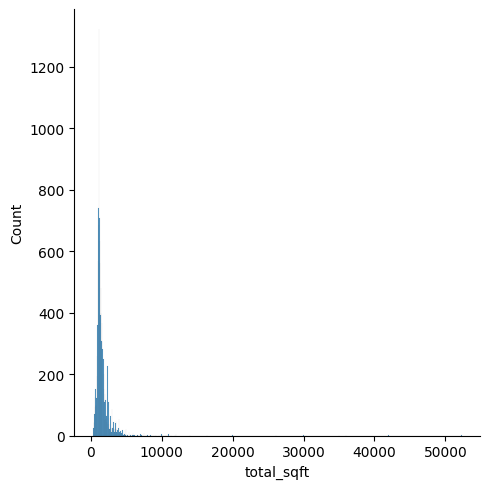

In [60]:
sns.displot(x=df['total_sqft'])

In [61]:
df.sample(3)

,location,total_sqft,bath,price,BHK,price_per_sqft
168,Electronic City,1060.0,2.0,60.0,2,5660.377358
10188,Sarjapur Road,1691.0,3.0,100.0,3,5913.660556
9609,JP Nagar,1960.0,3.0,138.0,3,7040.816327


In [62]:
df['price_per_sqft'].describe()

,price_per_sqft
count,12530.000000
mean,6303.979357
std,4162.237981
min,267.829813
25%,4210.526316
50%,5294.117647
75%,6916.666667
max,176470.588235


In [63]:
df.groupby('location')['price_per_sqft'].describe()

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Devarachikkanahalli,14.0,4969.906245,2594.870914,3185.840708,3649.081736,4305.148257,4676.936243,13333.333333
1st Block Jayanagar,10.0,12359.253758,3931.939592,6000.000000,11100.460123,12258.569501,15018.022329,18750.000000
1st Phase JP Nagar,23.0,9726.405918,4802.127570,5274.725275,7170.133907,8425.613866,9901.259524,25000.000000
2nd Phase Judicial Layout,11.0,4048.701183,674.730658,3500.000000,3500.000000,3500.000000,4739.316239,5000.000000
2nd Stage Nagarbhavi,9.0,14381.275720,5272.435848,5666.666667,14666.666667,15033.333333,18750.000000,20416.666667
...,...,...,...,...,...,...,...,...
Yelahanka,208.0,5177.606819,1761.479589,371.428571,4290.940767,5012.513762,5859.524889,19875.776398
Yelahanka New Town,38.0,5860.659870,3889.233175,1875.000000,3776.785714,5040.025016,5413.853463,22475.000000
Yelenahalli,13.0,4012.550871,533.259531,3125.000000,3800.000000,3835.625000,4121.212121,5176.876618


In [64]:
def remove_price_per_sqft_outliers(df):
    temp_df = pd.DataFrame()
    for location,sub_df in df.groupby('location'):
        mean = sub_df['price_per_sqft'].mean()
        std_dev = sub_df['price_per_sqft'].std()

        filtered_df = sub_df[(sub_df['price_per_sqft'] >= mean-std_dev) & (sub_df['price_per_sqft'] <= mean+std_dev)]
        temp_df = pd.concat([temp_df,filtered_df],ignore_index=True)
    return temp_df
df = remove_price_per_sqft_outliers(df)

In [65]:
df['price_per_sqft'].describe()

,price_per_sqft
count,10353.000000
mean,5660.848288
std,2270.910791
min,1250.000000
25%,4239.631336
50%,5175.600739
75%,6432.748538
max,24509.803922


In [66]:
df.sample(2)

,location,total_sqft,bath,price,BHK,price_per_sqft
8564,other,2400.0,3.0,290.000,3,12083.333333
1471,Budigere,1172.0,2.0,56.725,2,4840.017065


<Axes: xlabel='BHK', ylabel='count'>

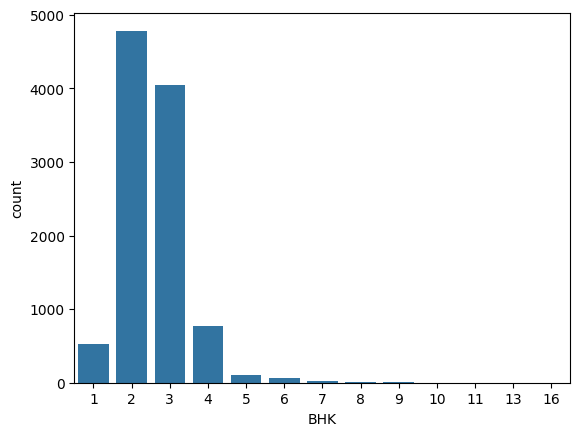

In [67]:
sns.countplot(x=df['BHK'])

<Axes: xlabel='BHK'>

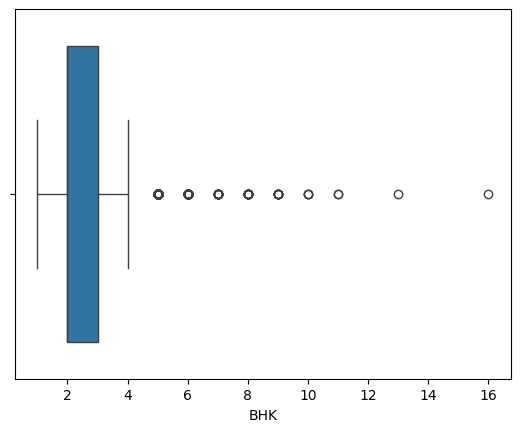

In [68]:
sns.boxplot(x=df['BHK'])

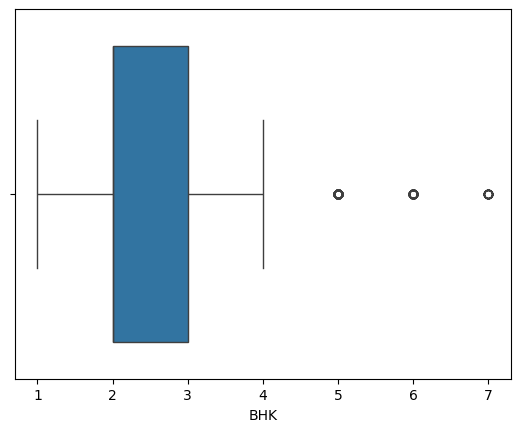

In [69]:
df = df[df['BHK'] <= 7].copy()
sns.boxplot(x=df['BHK'])
plt.show()

In [70]:
df.sample(2)

,location,total_sqft,bath,price,BHK,price_per_sqft
4809,Kundalahalli,1120.0,2.0,53.76,2,4800.000000
1216,Bhoganhalli,2119.0,4.0,111.00,4,5238.319962


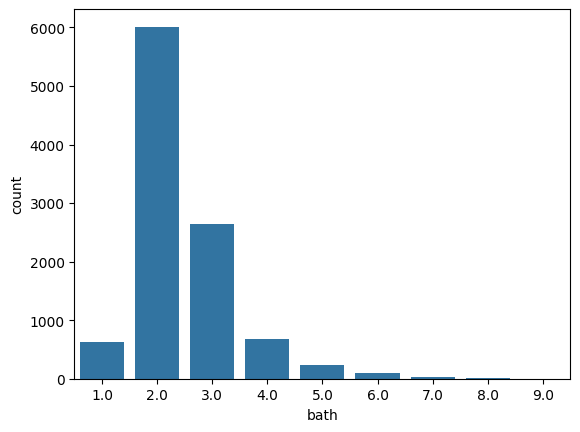

In [71]:
sns.countplot(x=df['bath'])
plt.show()

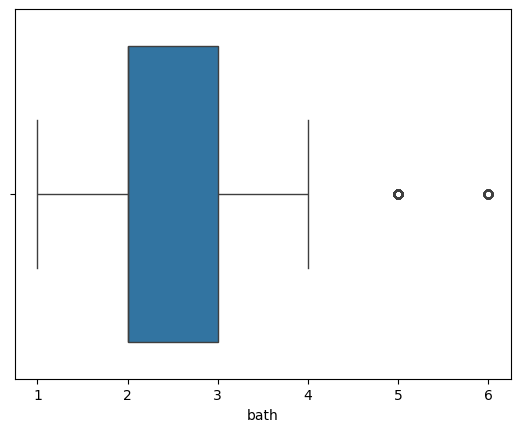

In [72]:
df = df[df['bath'] <= 6].copy()
df = df[df['bath'] <= df['BHK'] + 2].copy()
sns.boxplot(x=df['bath'])
plt.show()

In [73]:
df.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,10287.000000,10287.000000,10287.000000,10287.000000,10287.000000
mean,1491.338360,2.437737,90.257877,2.543696,5658.463876
std,837.874008,0.871027,82.457900,0.793476,2258.106894
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1107.000000,2.000000,48.950000,2.000000,4242.179863
50%,1280.000000,2.000000,67.000000,2.000000,5176.565008
75%,1645.000000,3.000000,100.000000,3.000000,6428.780162
max,30400.000000,6.000000,2100.000000,7.000000,24509.803922


In [74]:
df.sample(2)

,location,total_sqft,bath,price,BHK,price_per_sqft
6705,Thanisandra,1098.0,2.0,74.0,2,6739.526412
3863,Kadugodi,1314.0,2.0,68.2,2,5190.258752


In [75]:
df.drop(columns=['price_per_sqft'], inplace=True)
df.sample(3)

,location,total_sqft,bath,price,BHK
4698,Kothanur,1285.0,2.0,60.0,2
5381,Old Airport Road,2658.0,5.0,187.0,4
2109,Electronic City,635.0,1.0,28.0,1


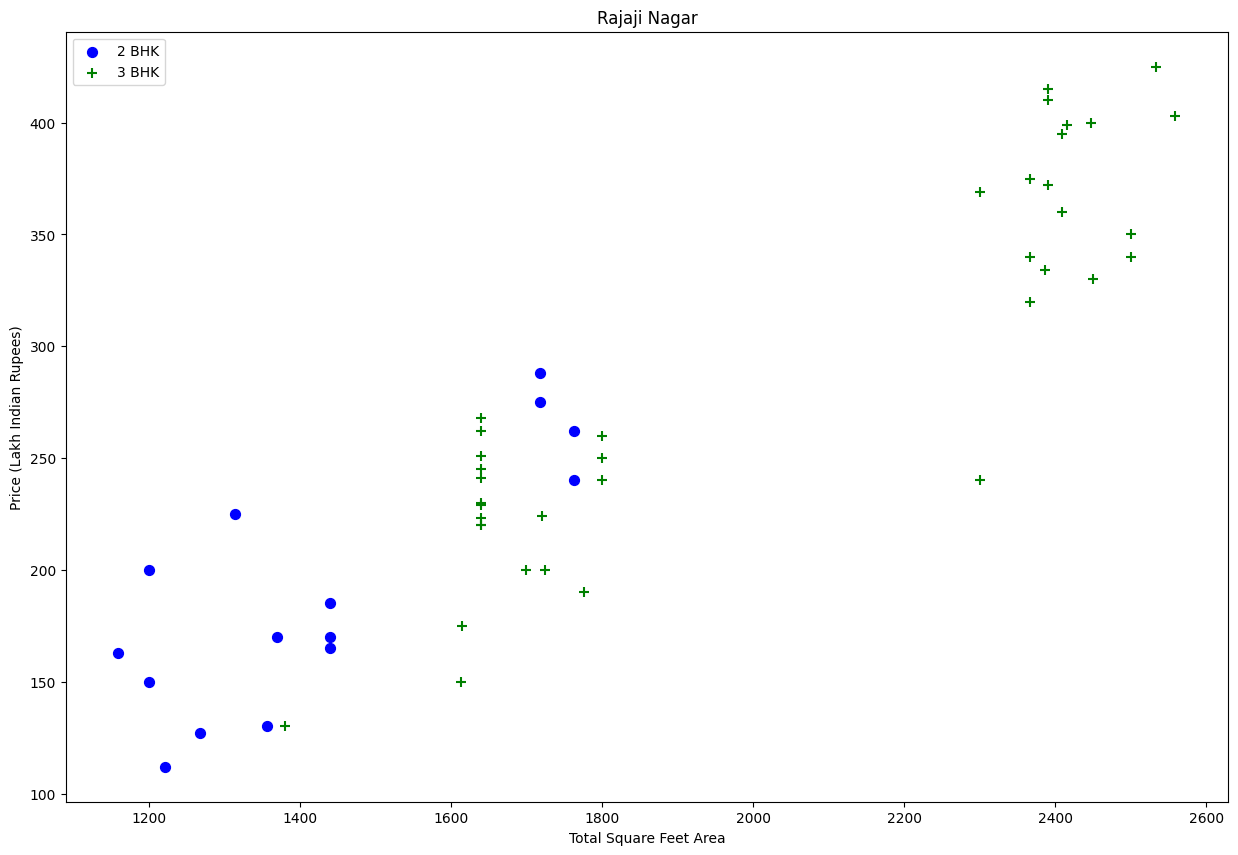

In [76]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    plt.figure(figsize=(15,10))
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    plt.show()
plot_scatter_chart(df,"Rajaji Nagar")

In [77]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['price']),df['price'],test_size=.2,random_state=2)

In [78]:
X_train.sample(3)

,location,total_sqft,bath,BHK
4669,Kothanur,1847.0,3.0,3
7628,Whitefield,1150.0,2.0,2
8462,other,1200.0,2.0,2


In [79]:
one_hot_transformer = ColumnTransformer([
    ('one_hot_encoder',OneHotEncoder(drop='first',sparse_output=False,dtype=int,handle_unknown='ignore'),['location'])
],remainder='passthrough')

In [80]:
scaler = StandardScaler()

#Linear Regresion

In [81]:
lr = LinearRegression()
pipe_lr = make_pipeline(one_hot_transformer,scaler,lr)
pipe_lr.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(drop='first',
                                                                dtype=<class 'int'>,
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [82]:
y_pred_lr = pipe_lr.predict(X_test)
r2_score(y_test,y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print("Linear Regression MSE:", mse_lr)
print("Linear Regression MAE:", mae_lr)
print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))

Linear Regression MSE: 1404.6754679371656
Linear Regression MAE: 20.41349240231387
Linear Regression R2 Score: 0.8017182860311155


#Lasso Regression

In [83]:
lasso = Lasso()
pipe_lasso = make_pipeline(one_hot_transformer,scaler,lasso)
pipe_lasso.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(drop='first',
                                                                dtype=<class 'int'>,
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [84]:
y_pred_lasso = pipe_lasso.predict(X_test)
r2_score(y_test,y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print("Lasso Regression MSE:", mse_lasso)
print("Lasso Regression MAE:", mae_lasso)
print("Lasso Regression R2 Score:", r2_score(y_test, y_pred_lasso))

Lasso Regression MSE: 1432.0172800476196
Lasso Regression MAE: 21.363507042922212
Lasso Regression R2 Score: 0.7978587601178185


#Ridge Regression

In [85]:
ridge = Ridge()
pipe_ridge = make_pipeline(one_hot_transformer,scaler,ridge)
pipe_ridge.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(drop='first',
                                                                dtype=<class 'int'>,
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [86]:
y_pred_ridge = pipe_ridge.predict(X_test)
r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print("Ridge Regression MSE:", mse_ridge)
print("Ridge Regression MAE:", mae_ridge)
print("Ridge Regression R2 Score:", r2_score(y_test, y_pred_ridge))

Ridge Regression MSE: 1404.4649113903793
Ridge Regression MAE: 20.412622534718217
Ridge Regression R2 Score: 0.8017480078522315


In [87]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe_lr, X_train, y_train, cv=10, scoring='r2').mean()

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


np.float64(0.8256778352282254)

#DecisionTree

In [88]:
dt=DecisionTreeRegressor()
# Using the previously defined one_hot_transformer and scaler
pipe=make_pipeline(one_hot_transformer,scaler,dt)
# Using the previously defined X_train and y_train
pipe.fit(X_train,y_train)
# Using the previously defined X_test

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(drop='first',
                                                                dtype=<class 'int'>,
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [89]:
y_pred_dt = pipe.predict(X_test) # Assuming 'pipe' is your Decision Tree pipeline
r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

print("Decision Tree MSE:", mse_dt)
print("Decision Tree MAE:", mae_dt)
print("Decision Tree R2 Score:", r2_dt)

Decision Tree MSE: 1374.3849382451585
Decision Tree MAE: 19.119900419627783
Decision Tree R2 Score: 0.8059940481423288


#RandomForest

In [90]:
rfc=RandomForestRegressor()
# Use the previously defined one_hot_transformer and scaler
pipe=make_pipeline(one_hot_transformer,scaler,rfc)
# Use the previously defined X_train and y_train
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(drop='first',
                                                                dtype=<class 'int'>,
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [91]:
# Assuming 'pipe' is your RandomForestRegressor pipeline
y_pred_rf = pipe.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("Random Forest MSE:", mse_rf)
print("Random Forest MAE:", mae_rf)
print("Random Forest R2 Score:", r2_rf)

Random Forest MSE: 1157.9362842129256
Random Forest MAE: 17.30014331965091
Random Forest R2 Score: 0.8365475895740704


#XGBoost

In [92]:
xgb=XGBRegressor()
pipe=make_pipeline(one_hot_transformer,scaler,xgb)
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(drop='first',
                                                                dtype=<class 'int'>,
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=Non...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [93]:
y_pred_xgb = pipe.predict(X_test) # Assuming 'pipe' is your XGBoost pipeline
r2_xgb = r2_score(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print("XGBoost MSE:", mse_xgb)
print("XGBoost MAE:", mae_xgb)
print("XGBoost R2 Score:", r2_xgb)

XGBoost MSE: 1056.6310744268533
XGBoost MAE: 17.35248357652344
XGBoost R2 Score: 0.8508476689083088


#KNN

In [94]:
knn_regressor = KNeighborsRegressor()
pipe_knn = make_pipeline(one_hot_transformer, scaler, knn_regressor)
pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(drop='first',
                                                                dtype=<class 'int'>,
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])

In [95]:
y_pred_knn = pipe_knn.predict(X_test)

r2_score_knn = r2_score(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

print("KNeighborsRegressor MSE:", mse_knn)
print("KNeighborsRegressor MAE:", mae_knn)
print("KNeighborsRegressor r2_score:", r2_score_knn)

KNeighborsRegressor MSE: 1713.4875230510204
KNeighborsRegressor MAE: 19.431191933916423
KNeighborsRegressor r2_score: 0.7581268764992393


#SVR

In [96]:
svr_regressor = SVR()
pipe_svr = make_pipeline(one_hot_transformer, scaler, svr_regressor)
pipe_svr.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(drop='first',
                                                                dtype=<class 'int'>,
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('svr', SVR())])

In [97]:

y_pred_svr = pipe_svr.predict(X_test)
r2_score_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)


print("SVR MSE:", mse_svr)
print("SVR MAE:", mae_svr)
print("SVR r2_score:", r2_score_svr)

SVR MSE: 5348.3868248292665
SVR MAE: 30.420071155424242
SVR r2_score: 0.2450303783313561


#GradientBoostingRegressor

In [98]:
gbr = GradientBoostingRegressor()

# Use the previously defined one_hot_transformer and scaler
pipe = make_pipeline(one_hot_transformer, scaler, gbr)

# Use the previously defined X_train and y_train
pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(drop='first',
                                                                dtype=<class 'int'>,
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('gradientboostingregressor', GradientBoostingRegressor())])

In [99]:
# Make predictions
y_pred_gbr = pipe.predict(X_test)
r2_score_gbr = r2_score(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)


print("GBR MSE:", mse_gbr)
print("GBR MAE:", mae_gbr)
print("GBR r2_score:", r2_score_gbr)

GBR MSE: 1212.8940038390158
GBR MAE: 19.951642572296908
GBR r2_score: 0.8287898468840201


In [100]:
print("LinearRegression r2_score: ",r2_score(y_test,y_pred_lr))
print("LassoRegression r2_score: ",r2_score(y_test,y_pred_lasso))
print("RidgeRegression r2_score: ",r2_score(y_test,y_pred_ridge))
# Corrected variable name from y_pred_d to y_pred_dt for Decision Tree
print("DecisionTreeRegressor r2_score: ",r2_score(y_test,y_pred_dt))
# Corrected variable name from y_pred_d to y_pred_rf for Random Forest
print("RandomForestRegressor r2_score: ",r2_score(y_test,y_pred_rf))
# Corrected variable name from y_pred_d to y_pred_xgb for XGBoost
print("XGBRegressor r2_score: ",r2_score(y_test,y_pred_xgb))
print("KNeighborsRegressor r2_score: ",r2_score_knn)
print("SVR r2_score: ",r2_score_svr)
print("GradientBoostingRegressor r2_score: ",r2_score(y_test,y_pred_gbr))

LinearRegression r2_score:  0.8017182860311155
LassoRegression r2_score:  0.7978587601178185
RidgeRegression r2_score:  0.8017480078522315
DecisionTreeRegressor r2_score:  0.8059940481423288
RandomForestRegressor r2_score:  0.8365475895740704
XGBRegressor r2_score:  0.8508476689083088
KNeighborsRegressor r2_score:  0.7581268764992393
SVR r2_score:  0.2450303783313561
GradientBoostingRegressor r2_score:  0.8287898468840201


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


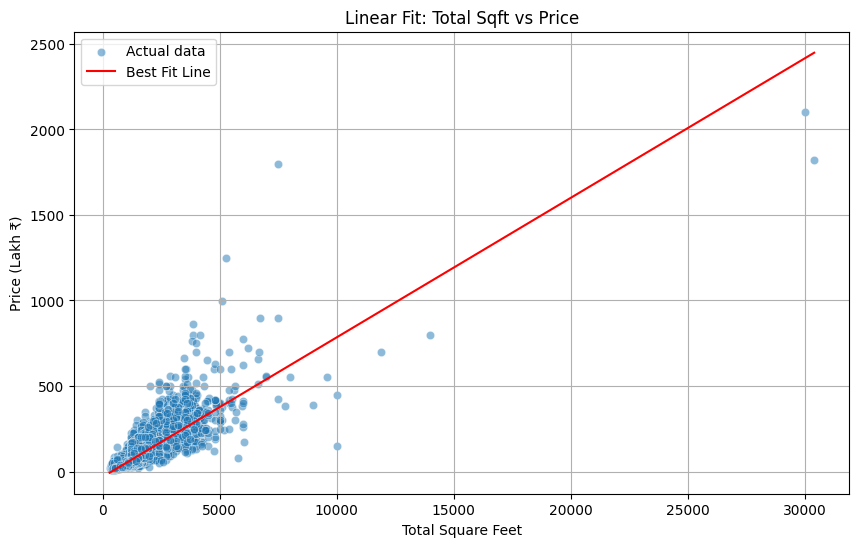

In [101]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['total_sqft'], y=df['price'], alpha=0.5, label='Actual data')
import numpy as np
from sklearn.linear_model import LinearRegression
temp_df_for_plot = df[['total_sqft', 'price']].copy()

sqft_range = np.linspace(temp_df_for_plot['total_sqft'].min(), temp_df_for_plot['total_sqft'].max(), 100).reshape(-1, 1)

model = LinearRegression()
model.fit(temp_df_for_plot[['total_sqft']], temp_df_for_plot['price'])
predicted_prices = model.predict(sqft_range)
plt.plot(sqft_range, predicted_prices, color='red', label='Best Fit Line')
plt.xlabel("Total Square Feet")
plt.ylabel("Price (Lakh ₹)")
plt.title("Linear Fit: Total Sqft vs Price")
plt.legend()
plt.grid(True)
plt.show()

In [102]:
# Linear Regresion
lr = LinearRegression()
pipe_lr = make_pipeline(one_hot_transformer,scaler,lr)
pipe_lr.fit(X_train,y_train)

y_pred_lr = pipe_lr.predict(X_test)
r2_lr = r2_score(y_test,y_pred_lr) # Assign R2 score to r2_lr
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print("Linear Regression MSE:", mse_lr)
print("Linear Regression MAE:", mae_lr)
print("Linear Regression R2 Score:", r2_lr) # Use r2_lr here

# Lasso Regression
lasso = Lasso()
pipe_lasso = make_pipeline(one_hot_transformer,scaler,lasso)
pipe_lasso.fit(X_train,y_train)

y_pred_lasso = pipe_lasso.predict(X_test)
r2_lasso = r2_score(y_test,y_pred_lasso) # Assign R2 score to r2_lasso
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print("Lasso Regression MSE:", mse_lasso)
print("Lasso Regression MAE:", mae_lasso)
print("Lasso Regression R2 Score:", r2_lasso) # Use r2_lasso here

# Ridge Regression
ridge = Ridge()
pipe_ridge = make_pipeline(one_hot_transformer,scaler,ridge)
pipe_ridge.fit(X_train,y_train)

y_pred_ridge = pipe_ridge.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge) # Assign R2 score to r2_ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print("Ridge Regression MSE:", mse_ridge)
print("Ridge Regression MAE:", mae_ridge)
print("Ridge Regression R2 Score:", r2_ridge) # Use r2_ridge here

Linear Regression MSE: 1404.6754679371656
Linear Regression MAE: 20.41349240231387
Linear Regression R2 Score: 0.8017182860311155
Lasso Regression MSE: 1432.0172800476196
Lasso Regression MAE: 21.363507042922212
Lasso Regression R2 Score: 0.7978587601178185
Ridge Regression MSE: 1404.4649113903793
Ridge Regression MAE: 20.412622534718217
Ridge Regression R2 Score: 0.8017480078522315


In [103]:
model_scores = {
    'Linear Regression': r2_lr, # r2_lr is now defined
    'Lasso Regression': r2_lasso, # r2_lasso is now defined
    'Ridge Regression': r2_ridge, # r2_ridge is now defined
    'Decision Tree': r2_dt,
    'Random Forest': r2_rf,
    'XGBoost': r2_xgb,
    'KNN': r2_score_knn,
    'SVR': r2_score_svr,
    'Gradient Boosting': r2_score(y_test,y_pred_gbr)
}

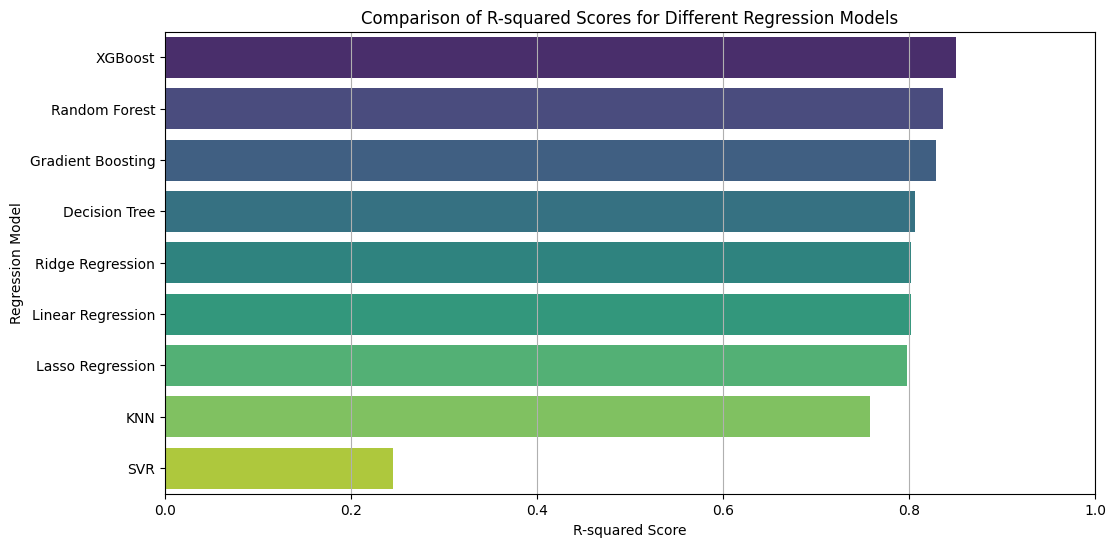

In [104]:
cores_df = pd.DataFrame(list(model_scores.items()), columns=['Model', 'R-squared Score'])
scores_df = cores_df.sort_values(by='R-squared Score', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='R-squared Score', y='Model', data=scores_df, palette='viridis')
plt.title('Comparison of R-squared Scores for Different Regression Models')
plt.xlabel('R-squared Score')
plt.ylabel('Regression Model')
plt.xlim(0, 1) # Set x-axis limits between 0 and 1 for R-squared
plt.grid(axis='x')
plt.show()

In [105]:
!pip install tensorflow

In [106]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Define categorical and numerical features list as used in the notebook
categorical_features = ['Country', 'State', 'City', 'Sector', 'Servant Room', 'Storeroom',
                        'Furnishing Type', 'Luxury', 'Floor Category']
# Define numerical features list as used in the notebook
numerical_features = ['total_sqft', 'bath', 'BHK', 'Property Age', 'Water Source Proximity',
                      'School Rating Proximity']

# Define the custom function used in the pipeline (copied from cell 116)
def to_category_dtype(X):
    X_copy = X.copy()
    for col in categorical_features:
        if col in X_copy.columns:
            # Use .copy() to avoid SettingWithCopyWarning
            X_copy[col] = X_copy[col].astype('category')
    return X_copy

# Create the ColumnTransformer for preprocessing (copied from cell 116)
# Ensure OneHotEncoder uses handle_unknown='ignore' and handles unseen categories correctly
one_hot_transformer = ColumnTransformer([
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
], remainder='passthrough') # Pass through numerical features

# Define the StandardScaler (copied from cell 116)
scaler = StandardScaler()

# Create dummy data consistent with the structure defined in cell 116
# This ensures the transformers can be fitted correctly within this cell
data = {
    'Country': ['India', 'India', 'India', 'India', 'USA', 'USA', 'USA', 'UK', 'UK', 'India', 'USA', 'India', 'India', 'India',
                'Canada', 'Canada', 'Germany', 'Germany', 'France', 'France', 'Australia', 'Australia', 'Brazil', 'Brazil',
                'India', 'India', 'USA', 'USA', 'UK', 'Canada', 'Germany', 'France', 'Australia', 'Brazil'],
    'State': ['Karnataka', 'Karnataka', 'Maharashtra', 'Andhra Pradesh', 'California', 'New York', 'California', 'England', 'England', 'Telangana', 'Andhra Pradesh', 'Andhra Pradesh', 'Andhra Pradesh', 'Florida',
              'Ontario', 'British Columbia', 'Bavaria', 'North Rhine-Westphalia', 'Île-de-France', 'Provence-Alpes-Côte d\'Azur', 'New South Wales', 'Victoria', 'São Paulo', 'Rio de Janeiro',
              'Tamil Nadu', 'West Bengal', 'Texas', 'Illinois', 'Scotland', 'Quebec', 'Berlin', 'Occitanie', 'Queensland', 'Minas Gerais'],
    'City': ['Bengaluru', 'Mysuru', 'Mumbai', 'Hyderabad', 'Los Angeles', 'New York City', 'San Francisco', 'London', 'Manchester', 'Hyderabad', 'Visakhapatnam', 'Vijayawada', 'Tirupati', 'Miami',
             'Toronto', 'Vancouver', 'Munich', 'Cologne', 'Paris', 'Marseille', 'Sydney', 'Melbourne', 'São Paulo', 'Rio de Janeiro',
             'Chennai', 'Kolkata', 'Houston', 'Chicago', 'Edinburgh', 'Montreal', 'Berlin', 'Toulouse', 'Brisbane', 'Belo Horizonte'],
    'total_sqft': [1200, 1500, 800, 1100, 2000, 1500, 2500, 1000, 900, 1050, 1300, 1400, 1000, 850,
                   1600, 1800, 950, 1150, 1300, 1000, 1700, 1450, 1100, 980,
                   1350, 950, 2200, 1400, 850, 1550, 1050, 1200, 1850, 1020],
    'bath': [2, 3, 1, 2, 3, 2, 4, 2, 1, 2, 2, 3, 2, 1,
             3, 3, 2, 2, 2, 2, 3, 2, 2, 2,
             2, 1, 3, 2, 1, 3, 2, 2, 3, 2],
    'BHK': [3, 4, 2, 3, 4, 3, 5, 3, 2, 3, 3, 4, 3, 2,
            3, 4, 2, 3, 3, 2, 4, 3, 3, 2,
            3, 2, 4, 3, 2, 3, 2, 3, 4, 2],
    'price': [100, 150, 80, 95, 800, 1200, 1500, 500, 400, 90, 600, 120, 80, 70,
              700, 900, 400, 450, 800, 350, 1000, 850, 300, 250,
              110, 75, 950, 650, 420, 750, 480, 550, 1100, 280] # Example prices (arbitrary)
}
df_global = pd.DataFrame(data) # Define df_global

# Add dummy features to df_global (copied from cell 116)
import random # Ensure random is imported

land_sector_types = ['Residential Plot', 'Agricultural Land', 'Commercial Zone', 'Industrial Area', 'Open Space']
servant_room_options = ['Yes', 'No']
storeroom_options = ['Yes', 'No']
furnishing_options = ['Furnished', 'Semi-Furnished', 'Unfurnished']
luxury_options = ['High', 'Medium', 'Low', 'None']
floor_category_options = ['Ground Floor', 'Low Rise', 'Mid Rise', 'High Rise']

def assign_dummy_sector(row):
    return random.choice(land_sector_types)

if 'Sector' not in df_global.columns:
    df_global['Sector'] = df_global.apply(assign_dummy_sector, axis=1)

if 'Property Age' not in df_global.columns:
    df_global['Property Age'] = [random.randint(0, 40) for _ in range(len(df_global))]

if 'Servant Room' not in df_global.columns:
    df_global['Servant Room'] = [random.choice(servant_room_options) for _ in range(len(df_global))]

if 'Storeroom' not in df_global.columns:
    df_global['Storeroom'] = [random.choice(storeroom_options) for _ in range(len(df_global))]

if 'Furnishing Type' not in df_global.columns:
    df_global['Furnishing Type'] = [random.choice(furnishing_options) for _ in range(len(df_global))]

if 'Luxury' not in df_global.columns:
    df_global['Luxury'] = [random.choice(luxury_options) for _ in range(len(df_global))]

if 'Floor Category' not in df_global.columns:
    df_global['Floor Category'] = [random.choice(floor_category_options) for _ in range(len(df_global))]

# Add conditional dummy features
if 'Water Source Proximity' not in df_global.columns:
     df_global['Water Source Proximity'] = [random.uniform(1, 10) for _ in range(len(df_global))]
     df_global.loc[df_global['Sector'] != 'Agricultural Land', 'Water Source Proximity'] = 0

if 'School Rating Proximity' not in df_global.columns:
     df_global['School Rating Proximity'] = [random.uniform(1, 5) for _ in range(len(df_global))]
     df_global.loc[df_global['Sector'] != 'Residential Plot', 'School Rating Proximity'] = 0

X_global = df_global[['Country', 'State', 'City', 'Sector', 'total_sqft', 'bath', 'BHK',
                      'Property Age', 'Servant Room', 'Storeroom', 'Furnishing Type',
                      'Luxury', 'Floor Category', 'Water Source Proximity', 'School Rating Proximity']]
y_global = df_global['price']


# Split data into training and testing sets (copied from cell 116)
X_train_global, X_test_global, y_train_global, y_test_global = train_test_split(X_global, y_global, test_size=0.2, random_state=42)


# Apply the preprocessing steps to the data for the deep learning model
# First, apply the one-hot encoding and passthrough of numerical columns
# Fit the transformer *before* transforming the data
one_hot_transformer.fit(X_global) # Fit on the entire dataset X_global
X_train_processed = one_hot_transformer.transform(X_train_global)
X_test_processed = one_hot_transformer.transform(X_test_global)

# Now, apply scaling to the processed data
# The output of one_hot_transformer is a NumPy array, which scaler expects
# Fit the scaler *before* transforming the data
scaler.fit(X_train_processed) # Fit only on training data
X_train_scaled = scaler.transform(X_train_processed)
X_test_scaled = scaler.transform(X_test_processed)

# Convert target variables to NumPy arrays
y_train_global_np = y_train_global.values
y_test_global_np = y_test_global.values

# Build a simple sequential deep learning model
model_dl = keras.Sequential([
    # The input layer will infer the input shape from the first batch of data,
    # but specifying it can be helpful for clarity and immediate error checking.
    # The shape should be the number of features after one-hot encoding and scaling.
    # We can get this from the shape of X_train_scaled.
    layers.InputLayer(shape=(X_train_scaled.shape[1],)), # Add an explicit InputLayer
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(1) # Output layer for regression
])

# Compile the model
model_dl.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model using the preprocessed and scaled data AND NumPy target variables
# Use the scaled data and NumPy target here
history = model_dl.fit(X_train_scaled, y_train_global_np,
                       epochs=50,
                       batch_size=32,
                       validation_split=0.2, # Use a validation set during training
                       verbose=1) # Set verbose to 1 to see training progress

# Evaluate the model on the test data using the preprocessed and scaled data AND NumPy target variables
# Use the scaled data and NumPy target here
loss, mae = model_dl.evaluate(X_test_scaled, y_test_global_np, verbose=0)

print(f"Deep Learning Model Mean Absolute Error on Test Data: {mae:.4f}")

# You can also get R2 score if needed, but it's not a default metric for Keras compile
# Use the scaled data here for prediction
y_pred_dl = model_dl.predict(X_test_scaled)
# Use NumPy target for R2 score calculation
r2_dl = r2_score(y_test_global_np, y_pred_dl)
print(f"Deep Learning Model R2 Score on Test Data: {r2_dl:.4f}")
/

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 375620.1875 - mae: 450.0480 - val_loss: 392687.9688 - val_mae: 583.4984
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 375396.0625 - mae: 449.7951 - val_loss: 392435.3750 - val_mae: 583.2869
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 374983.4375 - mae: 449.5502 - val_loss: 392186.9062 - val_mae: 583.0783
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 374690.1562 - mae: 449.3079 - val_loss: 391937.9062 - val_mae: 582.8687
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 374576.0625 - mae: 449.0895 - val_loss: 391689.6562 - val_mae: 582.6577
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 374173.5938 - mae: 448.7462 - val_loss: 391442.8750 - val_mae: 582.4481
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 373975.9375 - mae: 448.4698 - val_loss: 391199.0312 - val_mae: 582.2415
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 373653.1562 - mae: 448.2014 - val_loss

()

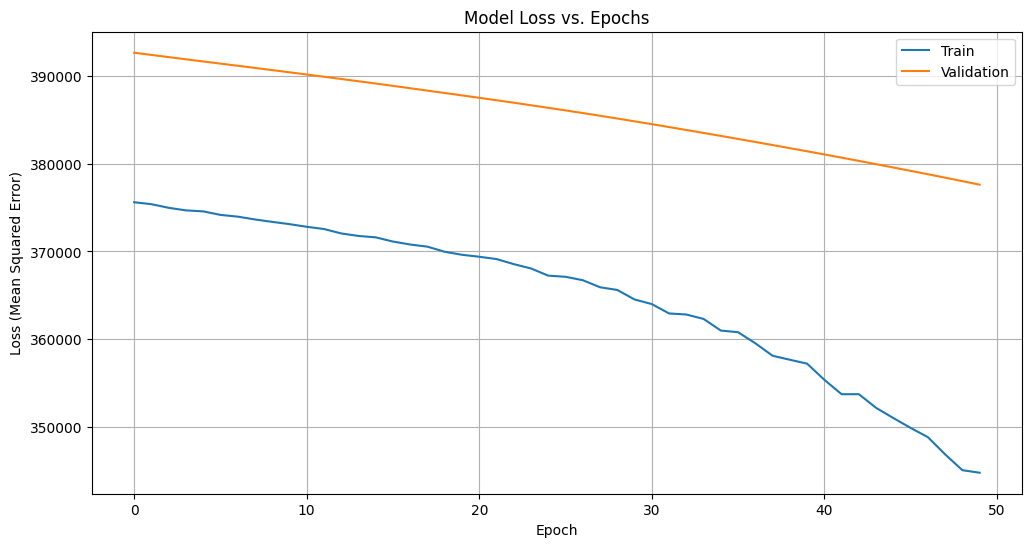

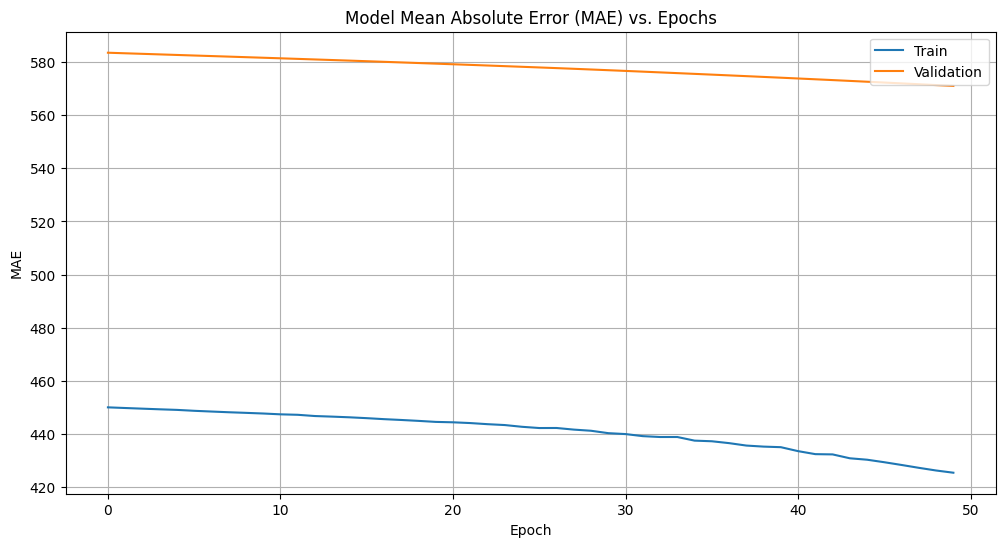

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the history object exists from the previous cell's training
if 'history' in locals():
    # Plot training & validation loss values
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'])
    # Check if validation loss was recorded (it should be with validation_split)
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'])
        plt.title('Model Loss vs. Epochs')
        plt.ylabel('Loss (Mean Squared Error)')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper right')
    else:
        # If no validation data was used
        plt.title('Model Training Loss vs. Epochs')
        plt.ylabel('Loss (Mean Squared Error)')
        plt.xlabel('Epoch')
    plt.grid(True)
    plt.show()

    # Plot training & validation MAE values
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['mae'])
    # Check if validation MAE was recorded
    if 'val_mae' in history.history:
        plt.plot(history.history['val_mae'])
        plt.title('Model Mean Absolute Error (MAE) vs. Epochs')
        plt.ylabel('MAE')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper right')
    else:
        # If no validation data was used
        plt.title('Model Training Mean Absolute Error (MAE) vs. Epochs')
        plt.ylabel('MAE')
        plt.xlabel('Epoch')
    plt.grid(True)
    plt.show()

else:
    print("The 'history' object was not found. Please run the cell training the deep learning model first.")

In [108]:
!pip install streamlit -q --ignore-installed blinker

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.3.0 which is incompatible.
tensorflow 2.19.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.3, but you have protobuf 6.31.1 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.0 which is incompatible.
google-colab 1.0.0 requires requests==2.32.3, but you have requests 2.32.4 which is incompatible.
google-colab 1.0.0 requires tornado==6.4.2, but you have tornado 6.5.1 which is incompatible.
google-ai-generativelanguage 0.6.15 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 6.31.1 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.19.0 which is 

In [109]:
# ... (your existing training code for GradientBoostingRegressor)

import joblib

# Save the trained pipeline to a file
# Ensure 'pipe' variable is defined by running the previous cell first
joblib.dump(pipe, 'gradient_boosting_pipeline.pkl')

print("Gradient Boosting pipeline saved successfully!")

Gradient Boosting pipeline saved successfully!


In [112]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)
pipe_global = make_pipeline(one_hot_transformer, scaler, gbr)
# Fit the pipeline using the global training data created in cell 116
pipe_global.fit(X_train_global, y_train_global)

print("Global pipeline defined and trained successfully!")
import joblib
import os
pipeline_filename = 'global_pipeline.pkl'

try:
    joblib.dump(pipe_global, pipeline_filename)
    print(f"Global pipeline saved successfully as '{pipeline_filename}'")
except Exception as e:
    print(f"An error occurred while saving the pipeline: {e}")
if os.path.exists(pipeline_filename):
    print(f"File '{pipeline_filename}' exists.")
else:
    print(f"File '{pipeline_filename}' was not created.")

Global pipeline defined and trained successfully!
Global pipeline saved successfully as 'global_pipeline.pkl'
File 'global_pipeline.pkl' exists.


In [114]:
# Save MAE
mae_filename = 'mae_global.pkl'
try:
    y_pred_global = pipe_global.predict(X_test_global)
    mae_global = mean_absolute_error(y_test_global, y_pred_global)
    joblib.dump(mae_global, mae_filename)
    print(f"Global MAE saved successfully as '{mae_filename}'")
except NameError as e:
    print(f"Error: {e}. Make sure pipe_global, X_test_global, and y_test_global are defined.")
except Exception as e:
    print(f"An error occurred while calculating and saving MAE: {e}")

Global MAE saved successfully as 'mae_global.pkl'


In [115]:
from IPython import get_ipython
from IPython.display import display
import warnings
warnings.simplefilter(action='ignore', category='FutureWarning')
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, VotingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
import joblib
import random
import operator
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Existing data creation
data = {
    'Country': ['India', 'India', 'India', 'India', 'USA', 'USA', 'USA', 'UK', 'UK', 'India', 'USA', 'India', 'India', 'India',
                'Canada', 'Canada', 'Germany', 'Germany', 'France', 'France', 'Australia', 'Australia', 'Brazil', 'Brazil',
                'India', 'India', 'USA', 'USA', 'UK', 'Canada', 'Germany', 'France', 'Australia', 'Brazil'],
    'State': ['Karnataka', 'Karnataka', 'Maharashtra', 'Andhra Pradesh', 'California', 'New York', 'California', 'England', 'England', 'Telangana', 'Andhra Pradesh', 'Andhra Pradesh', 'Andhra Pradesh', 'Florida',
              'Ontario', 'British Columbia', 'Bavaria', 'North Rhine-Westphalia', 'Île-de-France', 'Provence-Alpes-Côte d\'Azur', 'New South Wales', 'Victoria', 'São Paulo', 'Rio de Janeiro',
              'Tamil Nadu', 'West Bengal', 'Texas', 'Illinois', 'Scotland', 'Quebec', 'Berlin', 'Occitanie', 'Queensland', 'Minas Gerais'],
    'City': ['Bengaluru', 'Mysuru', 'Mumbai', 'Hyderabad', 'Los Angeles', 'New York City', 'San Francisco', 'London', 'Manchester', 'Hyderabad', 'Visakhapatnam', 'Vijayawada', 'Tirupati', 'Miami',
             'Toronto', 'Vancouver', 'Munich', 'Cologne', 'Paris', 'Marseille', 'Sydney', 'Melbourne', 'São Paulo', 'Rio de Janeiro',
             'Chennai', 'Kolkata', 'Houston', 'Chicago', 'Edinburgh', 'Montreal', 'Berlin', 'Toulouse', 'Brisbane', 'Belo Horizonte'],
    'total_sqft': [1200, 1500, 800, 1100, 2000, 1500, 2500, 1000, 900, 1050, 1300, 1400, 1000, 850,
                   1600, 1800, 950, 1150, 1300, 1000, 1700, 1450, 1100, 980,
                   1350, 950, 2200, 1400, 850, 1550, 1050, 1200, 1850, 1020],
    'bath': [2, 3, 1, 2, 3, 2, 4, 2, 1, 2, 2, 3, 2, 1,
             3, 3, 2, 2, 2, 2, 3, 2, 2, 2,
             2, 1, 3, 2, 1, 3, 2, 2, 3, 2],
    'BHK': [3, 4, 2, 3, 4, 3, 5, 3, 2, 3, 3, 4, 3, 2,
            3, 4, 2, 3, 3, 2, 4, 3, 3, 2,
            3, 2, 4, 3, 2, 3, 2, 3, 4, 2],
    'price': [100, 150, 80, 95, 800, 1200, 1500, 500, 400, 90, 600, 120, 80, 70,
              700, 900, 400, 450, 800, 350, 1000, 850, 300, 250,
              110, 75, 950, 650, 420, 750, 480, 550, 1100, 280] # Example prices (arbitrary)
}
df_global = pd.DataFrame(data)

# Add dummy features (ensure these are consistent with your Streamlit app)
land_sector_types = ['Residential Plot', 'Agricultural Land', 'Commercial Zone', 'Industrial Area', 'Open Space']
servant_room_options = ['Yes', 'No']
storeroom_options = ['Yes', 'No']
furnishing_options = ['Furnished', 'Semi-Furnished', 'Unfurnished']
luxury_options = ['High', 'Medium', 'Low', 'None']
floor_category_options = ['Ground Floor', 'Low Rise', 'Mid Rise', 'High Rise']

def assign_dummy_sector(row):
    # Add more specific sector assignments based on country/state if needed
    return random.choice(land_sector_types)

if 'Sector' not in df_global.columns:
    df_global['Sector'] = df_global.apply(assign_dummy_sector, axis=1)

if 'Property Age' not in df_global.columns:
    df_global['Property Age'] = [random.randint(0, 40) for _ in range(len(df_global))]

if 'Servant Room' not in df_global.columns:
    df_global['Servant Room'] = [random.choice(servant_room_options) for _ in range(len(df_global))]

if 'Storeroom' not in df_global.columns:
    df_global['Storeroom'] = [random.choice(storeroom_options) for _ in range(len(df_global))]

if 'Furnishing Type' not in df_global.columns:
    df_global['Furnishing Type'] = [random.choice(furnishing_options) for _ in range(len(df_global))]

if 'Luxury' not in df_global.columns:
    df_global['Luxury'] = [random.choice(luxury_options) for _ in range(len(df_global))]

if 'Floor Category' not in df_global.columns:
    df_global['Floor Category'] = [random.choice(floor_category_options) for _ in range(len(df_global))]

# Add conditional dummy features
if 'Water Source Proximity' not in df_global.columns:
     df_global['Water Source Proximity'] = [random.uniform(1, 10) for _ in range(len(df_global))]
     df_global.loc[df_global['Sector'] != 'Agricultural Land', 'Water Source Proximity'] = 0

if 'School Rating Proximity' not in df_global.columns:
     df_global['School Rating Proximity'] = [random.uniform(1, 5) for _ in range(len(df_global))]
     df_global.loc[df_global['Sector'] != 'Residential Plot', 'School Rating Proximity'] = 0


print("--- DataFrame with Expanded Dummy Features ---")
print(df_global.head())
print("\nValue counts for dummy 'Sector':")
print(df_global['Sector'].value_counts())

X_global = df_global[['Country', 'State', 'City', 'Sector', 'total_sqft', 'bath', 'BHK',
                      'Property Age', 'Servant Room', 'Storeroom', 'Furnishing Type',
                      'Luxury', 'Floor Category', 'Water Source Proximity', 'School Rating Proximity']]
y_global = df_global['price']

# Define categorical and numerical features for the ColumnTransformer
categorical_features = ['Country', 'State', 'City', 'Sector', 'Servant Room', 'Storeroom',
                        'Furnishing Type', 'Luxury', 'Floor Category']
numerical_features = ['total_sqft', 'bath', 'BHK', 'Property Age', 'Water Source Proximity',
                      'School Rating Proximity']

# Create a transformer to convert categorical columns to 'category' dtype
# This might help with internal type handling in OneHotEncoder
def to_category_dtype(X):
    X_copy = X.copy()
    for col in categorical_features:
        if col in X_copy.columns:
            X_copy[col] = X_copy[col].astype('category')
    return X_copy

category_converter = FunctionTransformer(func=to_category_dtype, validate=False)


# Create the ColumnTransformer for preprocessing
# Ensure OneHotEncoder uses handle_unknown='ignore' and handles unseen categories correctly
one_hot_transformer_global = ColumnTransformer([
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
], remainder='passthrough') # Pass through numerical features

# Define the StandardScaler
scaler_global = StandardScaler()

# Split data into training and testing sets
X_train_global, X_test_global, y_train_global, y_test_global = train_test_split(X_global, y_global, test_size=0.2, random_state=42)

# Define the model (Using GradientBoostingRegressor as an example)
gbr_global = GradientBoostingRegressor(random_state=42)

# Create the global pipeline, including the category_converter
pipe_global = make_pipeline(category_converter, one_hot_transformer_global, scaler_global, gbr_global)

# Train the global pipeline
pipe_global.fit(X_train_global, y_train_global)

print("\nGlobal pipeline defined and trained successfully!")

# Evaluate the model (optional, but good practice)
y_pred_global = pipe_global.predict(X_test_global)
r2_global = r2_score(y_test_global, y_pred_global)
mse_global = mean_squared_error(y_test_global, y_pred_global)
mae_global = mean_absolute_error(y_test_global, y_pred_global)

print(f"\nGlobal Model Evaluation:")
print(f"R2 Score: {r2_global:.4f}")
print(f"MSE: {mse_global:.4f}")
print(f"MAE: {mae_global:.4f}")

# Save location data and sector list
country_list = sorted(df_global['Country'].unique().tolist())

states_by_country = {}
for country in country_list:
    states_by_country[country] = sorted(df_global[df_global['Country'] == country]['State'].unique().tolist())

cities_by_state = {}
for state in df_global['State'].unique():
    cities_by_state[state] = sorted(df_global[df_global['State'] == state]['City'].unique().tolist())

# Get the list of unique sectors
sector_list = sorted(df_global['Sector'].unique().tolist())

# Save the location data and sector list
joblib.dump(country_list, 'country_list.pkl')
joblib.dump(states_by_country, 'states_by_country.pkl')
joblib.dump(cities_by_state, 'cities_by_state.pkl')
joblib.dump(sector_list, 'sector_list.pkl')

print("\nLocation and sector data saved for Streamlit app.")

# Define filenames for saved files
pipeline_filename = 'global_pipeline.pkl'
feature_importance_filename = 'feature_importance.pkl'


# Save the trained pipeline to a file
try:
    joblib.dump(pipe_global, pipeline_filename)
    print(f"Global pipeline saved successfully as '{pipeline_filename}'")
except Exception as e:
    print(f"An error occurred while saving the pipeline: {e}")

# Optional: Verify the file exists
if os.path.exists(pipeline_filename):
    print(f"File '{pipeline_filename}' exists.")
else:
    print(f"File '{pipeline_filename}' was not created.")

# Optional: Get feature importance if your model supports it and save it
if hasattr(gbr_global, 'feature_importances_'):
    # Get the names of the one-hot encoded columns
    # Need to get feature names after the category_converter step, then after OHE
    # We can access the fitted one-hot encoder within the pipeline
    fitted_ohe = pipe_global.named_steps['columntransformer'].named_transformers_['one_hot_encoder']
    ohe_features = list(fitted_ohe.get_feature_names_out(categorical_features))

    # Get the names of the remainder (numerical) columns
    remainder_features = numerical_features

    # Combine the feature names in the order they appear after transformation
    # The category_converter does not change column names or order, so this is safe
    transformed_features = ohe_features + remainder_features

    feature_importance = gbr_global.feature_importances_
    feature_importance_dict = dict(zip(transformed_features, feature_importance))

    joblib.dump(feature_importance_dict, feature_importance_filename)
    print(f"Feature importance saved to '{feature_importance_filename}'.")
else:
    print("Model does not have feature_importances_ attribute. Feature importance not saved.")
    # Save an empty dictionary or handle this in app.py
    joblib.dump({}, feature_importance_filename)

--- DataFrame with Expanded Dummy Features ---
  Country           State         City  total_sqft  bath  BHK  price  \
0   India       Karnataka    Bengaluru        1200     2    3    100   
1   India       Karnataka       Mysuru        1500     3    4    150   
2   India     Maharashtra       Mumbai         800     1    2     80   
3   India  Andhra Pradesh    Hyderabad        1100     2    3     95   
4     USA      California  Los Angeles        2000     3    4    800   

              Sector  Property Age Servant Room Storeroom Furnishing Type  \
0   Residential Plot             2           No        No       Furnished   
1  Agricultural Land            30           No        No  Semi-Furnished   
2  Agricultural Land            35          Yes       Yes  Semi-Furnished   
3  Agricultural Land            33          Yes        No     Unfurnished   
4   Residential Plot            25           No       Yes       Furnished   

   Luxury Floor Category  Water Source Proximity  School 

In [116]:
%%writefile app.py

import streamlit as st
import joblib
import pandas as pd
import numpy as np
import os
import operator
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
pipeline_filename = 'global_pipeline.pkl'
country_list_filename = 'country_list.pkl'
states_dict_filename = 'states_by_country.pkl'
cities_dict_filename = 'cities_by_state.pkl'
feature_importance_filename = 'feature_importance.pkl'
sector_list_filename = 'sector_list.pkl'
mae_filename = 'mae_global.pkl'
pipeline = None
country_list = []
states_by_country = {}
cities_by_state = {}
feature_importance_dict = {}
sector_list = []
global_mae = None
categorical_features = ['Country', 'State', 'City', 'Sector', 'Servant Room', 'Storeroom',
                        'Furnishing Type', 'Luxury', 'Floor Category']
# Define numerical features list
numerical_features = ['total_sqft', 'bath', 'BHK', 'Property Age', 'Water Source Proximity',
                      'School Rating Proximity']

# Define the custom function used in the pipeline
def to_category_dtype(X):
    X_copy = X.copy()
    for col in categorical_features:
        if col in X_copy.columns:
            # Use .copy() to avoid SettingWithCopyWarning
            X_copy[col] = X_copy[col].astype('category')
    return X_copy

# --- Load Saved Data ---
try:
    # Load the pipeline
    if os.path.exists(pipeline_filename):
        # Pass custom objects/functions to joblib.load
        pipeline = joblib.load(pipeline_filename, mmap_mode=None)
        st.success("Model loaded successfully!")
    else:
        st.error(f"Model file '{pipeline_filename}' not found. Please train and save the model first.")

    # Load MAE
    if os.path.exists(mae_filename):
        global_mae = joblib.load(mae_filename)
        st.info(f"Global Mean Absolute Error loaded: {global_mae:.2f}")
    else:
        st.warning(f"MAE file '{mae_filename}' not found. Cannot provide an estimated price range based on MAE.")
        global_mae = None # Set MAE to None if file not found
        # Provide a default or handle this case in the prediction display


    # Load location data
    if os.path.exists(country_list_filename):
        country_list = joblib.load(country_list_filename)
        if not country_list:
            st.warning("Country list loaded but is empty.")
            country_list = ['No Countries Found']
    else:
        st.warning(f"Country list file '{country_list_filename}' not found.")
        country_list = ['Loading Failed']

    if os.path.exists(states_dict_filename):
        states_by_country = joblib.load(states_dict_filename)
        if not states_by_country:
             st.warning("States dictionary loaded but is empty.")
             states_by_country = {'No States Found': ['Select Country']}
    else:
         st.warning(f"States dictionary file '{states_dict_filename}' not found.")
         states_by_country = {'Loading Failed': ['State 1']}

    if os.path.exists(cities_dict_filename):
        cities_by_state = joblib.load(cities_dict_filename)
        if not cities_by_state:
             st.warning("Cities dictionary loaded but is empty.")
             cities_by_state = {'No Cities Found': ['Select State']}
    else:
         st.warning(f"Cities dictionary file '{cities_dict_filename}' not found.")
         cities_by_state = {'State 1': ['City 1']}

    # Load sector list
    if os.path.exists(sector_list_filename):
        sector_list = joblib.load(sector_list_filename)
        if not sector_list:
            st.warning("Sector list loaded but is empty.")
            sector_list = ['No Sectors Found']
    else:
         st.warning(f"Sector list file '{sector_list_filename}' not found.")
         sector_list = ['Loading Failed']

    # Load feature importance
    if os.path.exists(feature_importance_filename):
        feature_importance_dict = joblib.load(feature_importance_filename)
        if not feature_importance_dict:
            st.info("Feature importance data is empty.")
            feature_importance_dict = {} # Ensure it's an empty dict if file is empty
    else:
         st.warning(f"Feature importance file '{feature_importance_filename}' not found.")
         feature_importance_dict = {} # Ensure it's an empty dict if file is missing


except Exception as e:
    st.error(f"An error occurred while loading model or data files: {e}")
    pipeline = None
    country_list = ['Error Loading']
    states_by_country = {'Error Loading': ['Check Files']}
    cities_by_state = {'Check Files': ['Error Loading']}
    feature_importance_dict = {}
    sector_list = ['Error Loading']
    global_mae = None


# Streamlit App Title
st.title("House Price Prediction")

st.write("Select the property details and location and land sector type to get a price prediction based on the trained model.")

# Check if model loaded successfully before proceeding
if pipeline is None:
    st.info("Model could not be loaded. Please ensure the training script ran successfully and generated the required .pkl files.")
else:
    # --- User Input Section ---
    st.sidebar.header("Property Details and Location")

    # Select Country
    selected_country = st.sidebar.selectbox("Select Country", country_list)

    # Select State based on selected Country
    state_list = states_by_country.get(selected_country, ['Select a Country first'])
    selected_state = st.sidebar.selectbox("Select State", state_list)

    # Select City based on selected State
    city_list = cities_by_state.get(selected_state, ['Select a State first'])
    selected_city = st.sidebar.selectbox("Select City", city_list)

    # Select Sector
    selected_sector = st.sidebar.selectbox("Select Land Sector Type", sector_list)

    total_sqft = st.sidebar.number_input("Total Square Feet", min_value=100, max_value=100000, value=1200)
    bhk = st.sidebar.number_input("Number of Bedrooms (BHK)", min_value=1, max_value=20, value=3)
    bath = st.sidebar.number_input("Number of Bathrooms", min_value=1, max_value=20, value=2)
    property_age = st.sidebar.number_input("Property Age (Years)", min_value=0, max_value=100, value=5)
    servant_room = st.sidebar.selectbox("Servant Room", ["Yes", "No"])
    storeroom = st.sidebar.selectbox("Storeroom", ["Yes", "No"])
    furnishing_type = st.sidebar.selectbox("Furnishing Type", ["Furnished", "Semi-Furnished", "Unfurnished"])
    luxury = st.sidebar.selectbox("Luxury", ["High", "Medium", "Low", "None"])
    floor_category = st.sidebar.selectbox("Floor Category", ["Ground Floor", "Low Rise", "Mid Rise", "High Rise"])

    # Add conditional dummy features input
    water_source_proximity = st.sidebar.number_input("Water Source Proximity (1-10, Lower is better, 0 if not agricultural)", min_value=0.0, max_value=10.0, value=0.0)
    school_rating_proximity = st.sidebar.number_input("School Rating Proximity (1-5, Lower is better, 0 if not residential)", min_value=0.0, max_value=5.0, value=0.0)


    if st.sidebar.button("Predict Price"):
        # Check if valid selections were made
        if 'Loading Failed' in [selected_country, selected_state, selected_city, selected_sector] or \
           'Error Loading' in [selected_country, selected_state, selected_city, selected_sector] or \
           'No Countries Found' in selected_country or \
           selected_state == 'Select a Country first' or \
           selected_city == 'Select a State first' or \
           'No States Found' in selected_state or \
           'No Cities Found' in selected_city or \
           'No Sectors Found' in selected_sector:
             st.warning("Please select a valid Country, State, City, and Land Sector Type before predicting.")
        else:
            # Create a DataFrame from user input
            # Ensure columns match the training data used to train the pipeline
            input_data = pd.DataFrame([[selected_country, selected_state, selected_city, selected_sector,
                                        total_sqft, bath, bhk, property_age, servant_room, storeroom,
                                        furnishing_type, luxury, floor_category,
                                        water_source_proximity, school_rating_proximity]],
                                      columns=['Country', 'State', 'City', 'Sector',
                                               'total_sqft', 'bath', 'BHK', 'Property Age', 'Servant Room',
                                               'Storeroom', 'Furnishing Type', 'Luxury', 'Floor Category',
                                               'Water Source Proximity', 'School Rating Proximity'])

            # Debug: Show input data structure
            st.write("Input Data for Prediction:")
            st.dataframe(input_data)
            st.write(f"Input Data Types:\n{input_data.dtypes}")


            try:
                # Make prediction using the loaded pipeline
                predicted_price = pipeline.predict(input_data)[0]

                # Display the predicted price and range using rate terminology
                st.subheader("Estimated Price Rate")
                st.write(f"Predicted Rate: ₹{predicted_price:,.2f} Lakhs")

                if global_mae is not None:
                    lower_bound = predicted_price - global_mae
                    upper_bound = predicted_price + global_mae
                    st.write(f"Estimated Rate Range (± MAE): ₹{max(0, lower_bound):,.2f} Lakhs to ₹{upper_bound:,.2f} Lakhs")
                else:
                    st.info("Estimated price rate range is not available because MAE was not loaded.")


                # --- Generate Data for Line Chart (Varying total_sqft) ---
                st.subheader("Estimated Price Rate vs. Total Square Feet")
                num_points = 50 # Number of points for the line chart
                # Create a range of total_sqft values around the user input
                sqft_min = max(100, total_sqft * 0.5) # Ensure minimum is at least 100
                sqft_max = total_sqft * 1.5
                sqft_range = np.linspace(sqft_min, sqft_max, num_points)

                # Create DataFrames for prediction, varying total_sqft
                plot_data = []
                for sqft in sqft_range:
                     # Create a copy of the input data and modify total_sqft
                     temp_input_data = input_data.copy()
                     temp_input_data['total_sqft'] = sqft

                     # Predict price for this sqft value
                     try:
                         predicted_price_for_sqft = pipeline.predict(temp_input_data)[0]
                         plot_data.append({'total_sqft': sqft, 'predicted_price': predicted_price_for_sqft})
                     except Exception as e:
                         # Handle potential errors during prediction for a range of values
                         # st.warning(f"Could not predict for sqft={sqft:.2f}: {e}") # Comment out this warning to avoid spamming
                         plot_data.append({'total_sqft': sqft, 'predicted_price': np.nan}) # Add NaN to plot

                plot_df = pd.DataFrame(plot_data).dropna() # Drop rows with NaN predictions

                # Debug: Show plot data info
                st.write("Plot Data Info:")
                st.write(f"Shape: {plot_df.shape}")
                st.write(f"Head:\n{plot_df.head()}")


                if not plot_df.empty:
                     # Create the line chart
                     fig, ax = plt.subplots(figsize=(10, 6))
                     sns.lineplot(x='total_sqft', y='predicted_price', data=plot_df, ax=ax)
                     ax.set_title('Predicted Price Rate vs. Total Square Feet')
                     ax.set_xlabel("Total Square Feet")
                     ax.set_ylabel("Estimated Price Rate (Lakh ₹)") # Adjusted label
                     ax.grid(True)
                     st.pyplot(fig)
                else:
                    st.warning("Could not generate data for the price vs. sqft plot. Check if predictions failed for the generated sqft range.")


                # --- Display Feature Importance ---
                if feature_importance_dict:
                    st.subheader("Feature Importance (Top 10)")
                    # Sort feature importance and get top 10
                    sorted_importance = sorted(feature_importance_dict.items(), key=operator.itemgetter(1), reverse=True)[:10]
                    importance_df = pd.DataFrame(sorted_importance, columns=['Feature', 'Importance'])

                    # Debug: Show importance data info
                    st.write("Feature Importance Data Info:")
                    st.write(f"Shape: {importance_df.shape}")
                    st.write(f"Head:\n{importance_df.head()}")


                    if not importance_df.empty:
                        # Create a bar plot in the app
                        fig, ax = plt.subplots(figsize=(8, 5))
                        # Modified sns.barplot to use hue and legend=False
                        sns.barplot(x='Importance', y='Feature', data=importance_df, ax=ax, palette='viridis', hue='Feature', legend=False)
                        ax.set_title('Top 10 Feature Importances')
                        ax.set_xlabel('Importance Score')
                        ax.set_ylabel('Feature')
                        st.pyplot(fig) # Display the plot in Streamlit
                    else:
                        st.info("Feature importance data is empty or contains no relevant features.")

                else:
                    st.info("Feature importance data not available or empty.")


            except ValueError as ve:
                 st.error(f"Error during prediction: {ve}. This might be due to unseen categorical values. Please ensure the selected location and sector were present in the training data or handle unknown values in your pipeline (which handle_unknown='ignore' should help with, but other data issues are possible).")
            except Exception as e:
                st.error(f"An unexpected error occurred during prediction: {e}")

Overwriting app.py


In [117]:
!wget -q -O - ipv4.icanhazip.com

34.134.23.64


In [118]:
! streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.134.23.64:8501

⠼⠴your url is: https://itchy-cups-find.loca.lt
  Stopping...
^C
